In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
Omega = 100
alpha = 2.5
epsilon = 0.01
gamma = 1
N_initial = 1
T = 100
N_samples = 200

times_ensemble = []
infected_ensemble = []

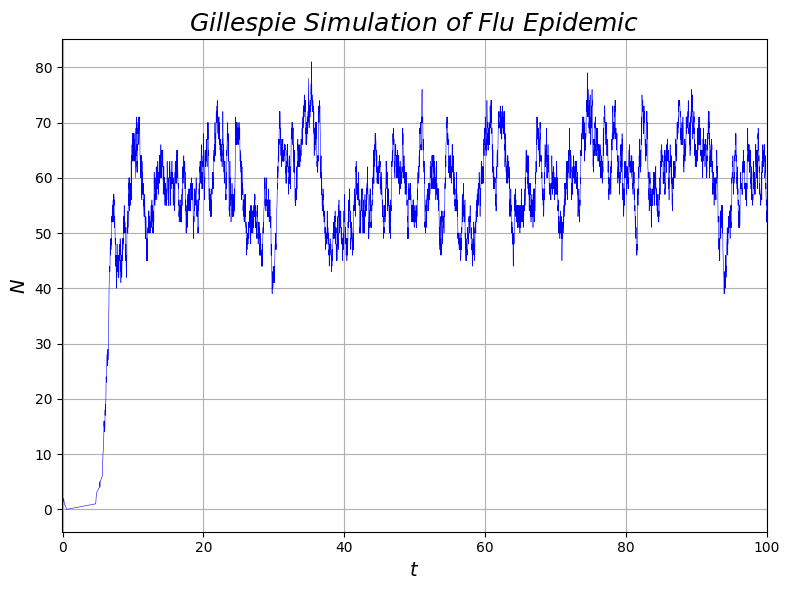

In [7]:
for sample in range(N_samples):
    N = N_initial
    t = 0
    times = [t]
    infected = [N]
    
    while t < T:
        a1 = alpha * N / Omega * (Omega - N) + epsilon * (Omega - N)
        a2 = gamma * N
        a0 = a1 + a2

        r1 = np.random.uniform(0, 1)
        r2 = np.random.uniform(0, 1)
        
        tau = (1 / a0) * np.log(1 / r1)
        t += tau

        if t > T:
            break

        if r2 * a0 < a1:
            N += 1
        else:
            N -= 1

        times.append(t)
        infected.append(N)
    
    times_ensemble.append(times)
    infected_ensemble.append(infected)

fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(times_ensemble[0], infected_ensemble[0], 'b', linewidth = 0.4)
ax.set_xlabel('$t$', fontsize = 14)
ax.set_ylabel('$N$', fontsize = 14)
ax.set_title('$Gillespie\ Simulation \ of \ Flu\ Epidemic$', fontsize = 18)
ax.set_xlim([-0.1, T])

plt.grid()
fig.tight_layout()
plt.show()

In [8]:
steady_state_start = 20  
mean = []
variance = []

for i in range(N_samples):
    indices = [j for j, time in enumerate(times_ensemble[i]) if time >= steady_state_start]
    steady_times = [times_ensemble[i][j] for j in indices]
    steady_sick = [infected_ensemble[i][j] for j in indices]
    
    if len(steady_times) > 1:
        time_diffs = np.diff(steady_times)
        weighted_mean_N = np.average(steady_sick[:-1], weights=time_diffs)
        weighted_variance_N = np.average((steady_sick[:-1] - weighted_mean_N)**2, weights=time_diffs)
        mean.append(weighted_mean_N)
        variance.append(weighted_variance_N)

mean_N = np.mean(mean)
variance_N = np.mean(variance)

print('Mean:', mean_N)
print('Variance:', variance_N)

Mean: 59.48679788931988
Variance: 39.81861023669013
